In [1]:
from causalimpact import CausalImpact

import numpy as np
import pandas as pd
import datetime
from datetime import datetime

from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Installs - Fact global

In [2]:
installs_fg = pd.read_csv("installs_fact_global.csv", parse_dates=['INSTALL_TIMESTAMP'])

installs_fg.set_index('INSTALL_TIMESTAMP', inplace=True)

installs_fg

,INSTALLS
INSTALL_TIMESTAMP,
2022-05-01,5317
2022-05-02,7244
2022-05-03,6682
2022-05-04,6511
2022-05-05,7376
...,...
2022-11-12,6752
2022-11-13,4744
2022-11-14,5755


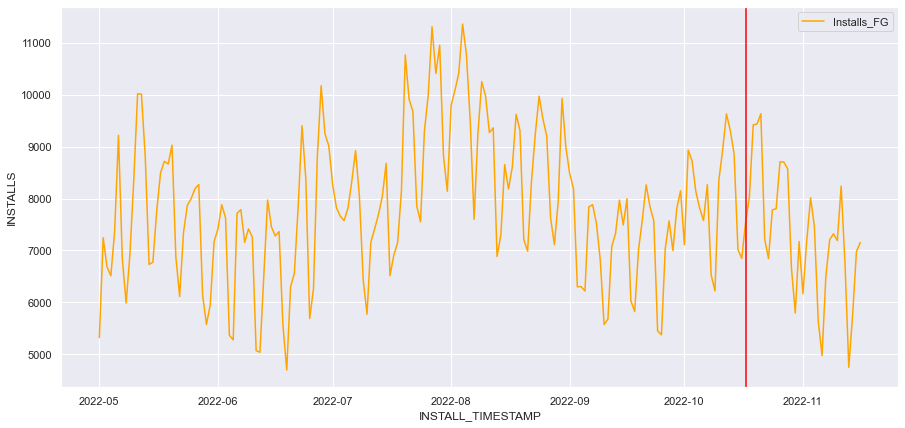

In [3]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(x=installs_fg.index, y=installs_fg['INSTALLS'], color = 'orange')
plt.axvline(installs_fg[installs_fg.index == '2022-10-17'].index, color='red')
plt.legend(labels = ['Installs_FG'])

In [4]:
print('Installs for the post period: ',installs_fg.loc[(installs_fg.index >= '2022-10-17') ].sum())

Installs for the post period:  INSTALLS    226599
dtype: int64


In [5]:
print('Trials for the pre period: ', installs_fg.loc[(installs_fg.index < '2022-10-17') & (installs_fg.index >= '2022-05-01') ].sum())

Trials for the pre period:  INSTALLS    1327266
dtype: int64


In [6]:
# Set pre-period
pre_period = [str('2022-05-01'), str('2022-10-16')]
# Set post-period
post_period = [str('2022-10-17'), str('2022-11-16')]

In [7]:
print('Pre-period is from ', pre_period[0], ' to ', pre_period[1])
print('Post-period is from ', post_period[0], ' to ', post_period[1])

Pre-period is from  2022-05-01  to  2022-10-16
Post-period is from  2022-10-17  to  2022-11-16


Causal impact model

C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(


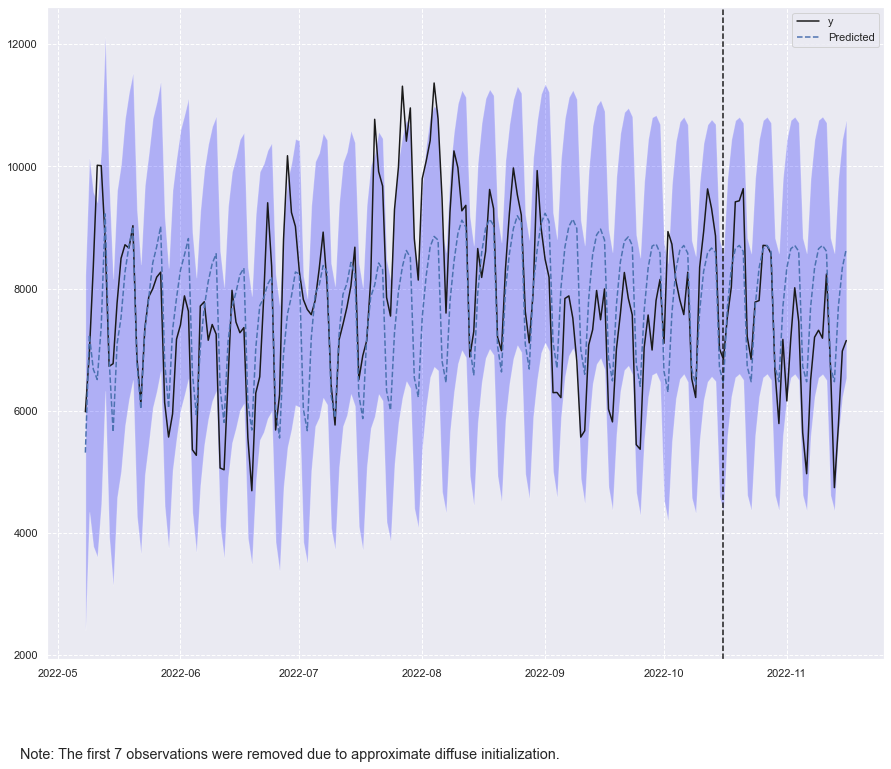

In [8]:
# Causal impact model, prior_level_sd default of 0.01
impact = CausalImpact(data=installs_fg, pre_period=pre_period, post_period=post_period,
                     nseasons=[{'period': 7}]
                      #,  prior_level_sd = None
                     )
impact.plot(panels=['original'])

In [9]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 7309.65. By contrast, in the absence of an
intervention, we would have expected an average response of 7921.63.
The 95% interval of this counterfactual prediction is [7462.39, 8390.81].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -611.99 with a 95% interval of
[-1081.16, -152.75]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 226599.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 245570.58. The 95% interval of this prediction is [231334.1, 260115.08].


The above results are given in terms of absolute numbers. In relative
t

**decrease of -7.73%**

# **By platform - Fact Global**

In [10]:
installs_fg_os = pd.read_csv("installs_fact_global_os.csv", parse_dates=['INSTALL_TIMESTAMP'])

installs_fg_os.set_index('INSTALL_TIMESTAMP', inplace=True)

installs_fg_os

,PLATFORM,INSTALLS
INSTALL_TIMESTAMP,,
2022-05-01,iOS,3169
2022-05-01,Android,2148
2022-05-02,Android,3140
2022-05-02,iOS,4104
2022-05-03,iOS,3934
...,...,...
2022-11-14,Android,2381
2022-11-15,Android,2722
2022-11-15,iOS,4257


In [11]:
ios_fg = installs_fg_os[installs_fg_os.PLATFORM == 'iOS']

In [12]:
ios_fg.shape

(200, 2)

In [13]:
android_fg = installs_fg_os[installs_fg_os.PLATFORM == 'Android']

iOS

In [14]:
# Set pre-period
pre_period = [str('2022-05-01'), str('2022-10-16')]
# Set post-period
post_period = [str('2022-10-17'), str('2022-11-16')]

C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(


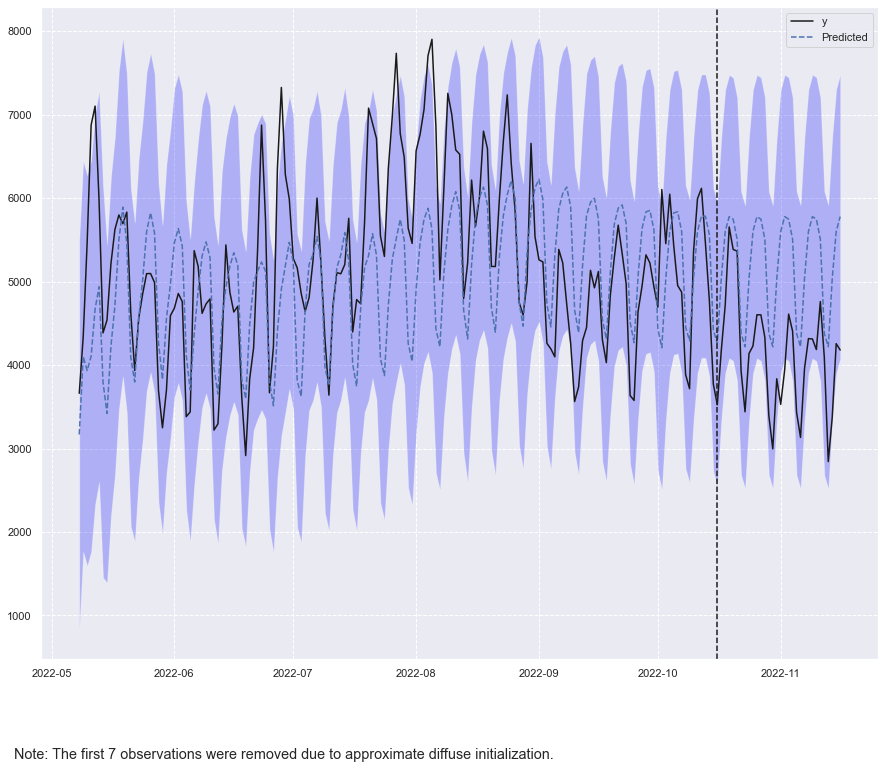

In [15]:
# Causal impact model, prior_level_sd default of 0.01
impact = CausalImpact(data=ios_fg['INSTALLS'], pre_period=pre_period, post_period=post_period,
                      #prior_level_sd = 0.1,
                     nseasons=[{'period': 7}]
                     )
impact.plot(panels=['original'])

In [16]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 4133.55. By contrast, in the absence of an
intervention, we would have expected an average response of 5209.85.
The 95% interval of this counterfactual prediction is [4851.56, 5613.04].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1076.3 with a 95% interval of
[-1479.49, -718.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 128140.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 161505.33. The 95% interval of this prediction is [150398.43, 174004.32].


The above results are given in terms of absolute numbers. In relative


**decrease of -20.66%** \
observed: 128140.0 \
predicted: 161505.33 \
difference: -33.365

Android

C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(


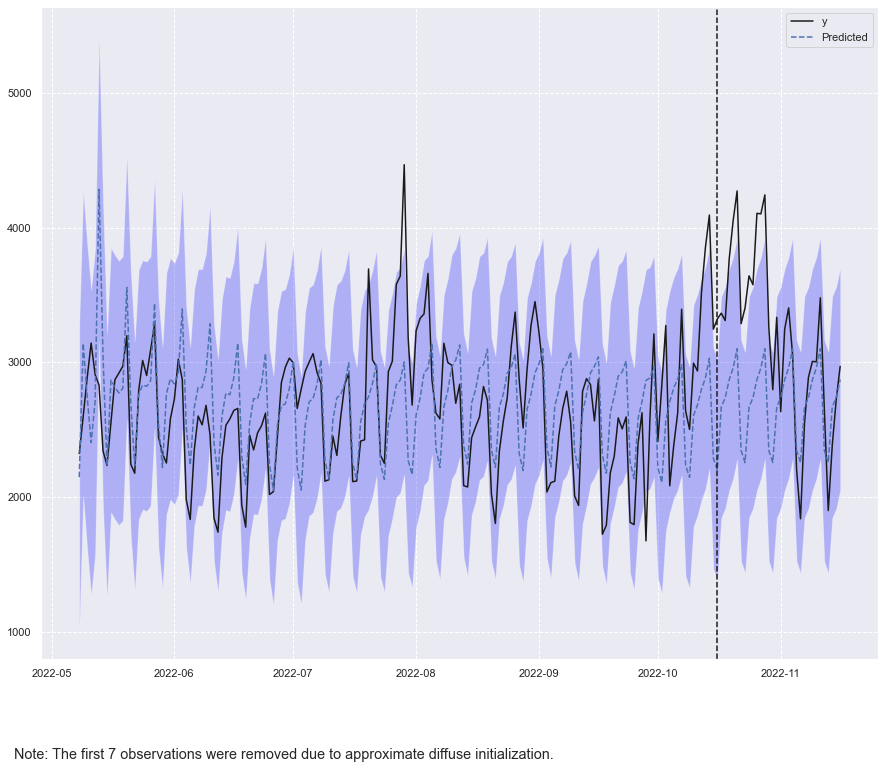

In [17]:
# Causal impact model, prior_level_sd default of 0.01
impact = CausalImpact(data=android_fg['INSTALLS'], pre_period=pre_period, post_period=post_period,
                      #prior_level_sd = 0.1,
                     nseasons=[{'period': 7}]
                     )
impact.plot(panels=['original'])

In [18]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 3176.1. By contrast, in the absence of an
intervention, we would have expected an average response of 2710.74.
The 95% interval of this counterfactual prediction is [2532.84, 2894.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 465.35 with a 95% interval of
[281.8, 643.25]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 98459.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 84033.05. The 95% interval of this prediction is [78518.18, 89723.33].


The above results are given in terms of absolute numbers. In relative
terms, the 

**increase of +17.17%** \
observed: 98459 \
predicted: 84033.05 \
difference: 14.426